In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Data Exploration/Cleaning

In [2]:
df = pd.read_csv("~/Downloads/Californa_Wine_Production_1980_2020.csv")

In [3]:
df

,Year,CommodityCode,CropName,CountyCode,County,HarvestedAcres,Yield(Unit/Acre),Production,Price(Dollars/Unit),Unit,Value(Dollars)
0,2020,216299,GRAPESWINE,1,Alameda,2530.0,5.14,13000.0,1497.69,Tons,19470000
1,2020,216299,GRAPESWINE,5,Amador,5360.0,2.31,12400.0,1318.31,Tons,16347000
2,2020,216299,GRAPESWINE,9,Calaveras,579.0,3.06,1770.0,1325.99,Tons,2347000
3,2020,216299,GRAPESWINE,11,Colusa,747.0,6.02,4500.0,684.67,Tons,3081000
4,2020,216299,GRAPESWINE,13,ContraCosta,1940.0,4.69,9090.0,751.27,Tons,6829000
...,...,...,...,...,...,...,...,...,...,...,...
1310,1980,216299,GRAPESWINE,95,Solano,1138.0,3.99,4544.0,315.00,TONS,1433300
1311,1980,216299,GRAPESWINE,97,Sonoma,23639.0,3.34,78941.0,506.00,TONS,39982000
1312,1980,216299,GRAPESWINE,99,Stanislaus,17950.0,8.80,157900.0,183.00,TONS,28848000
1313,1980,216299,GRAPESWINE,107,Tulare,15159.0,8.88,134600.0,170.00,TONS,22902000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1315 non-null   int64  
 1   CommodityCode        1315 non-null   int64  
 2   CropName             1315 non-null   object 
 3   CountyCode           1315 non-null   int64  
 4   County               1315 non-null   object 
 5   HarvestedAcres       1302 non-null   float64
 6   Yield(Unit/Acre)     1266 non-null   float64
 7   Production           1278 non-null   float64
 8   Price(Dollars/Unit)  1278 non-null   float64
 9   Unit                 1279 non-null   object 
 10  Value(Dollars)       1315 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 113.1+ KB


In [5]:
df.nunique()

Year                     41
CommodityCode             1
CropName                  1
CountyCode               41
County                   42
HarvestedAcres         1048
Yield(Unit/Acre)        676
Production             1161
Price(Dollars/Unit)    1061
Unit                      5
Value(Dollars)         1277
dtype: int64

In [6]:
df['Unit'].unique()

array(['Tons', nan, 'tons', 'TONS', 'TON', 'ACRE'], dtype=object)

In [7]:
df[df['Unit'] == 'ACRE']

,Year,CommodityCode,CropName,CountyCode,County,HarvestedAcres,Yield(Unit/Acre),Production,Price(Dollars/Unit),Unit,Value(Dollars)
732,1999,216299,GRAPESWINE,1,Alameda,2018.0,3.57,7210.0,1182.0,ACRE,8523000


In [8]:
df = df[df['Unit'] != 'ACRE']

In [9]:
df = df[df['Yield(Unit/Acre)'].notna()]

## Number of Wine Producing Counties Over the Years

In [10]:
year_count = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

year = 1980
index = 0
while year < 2021:
    for i in df['Year']:
        if i == year:
            year_count[index] += 1
    year += 1
    index += 1

In [11]:
years = []
start = 1980
while start < 2021:
    years.append(start)
    start += 1

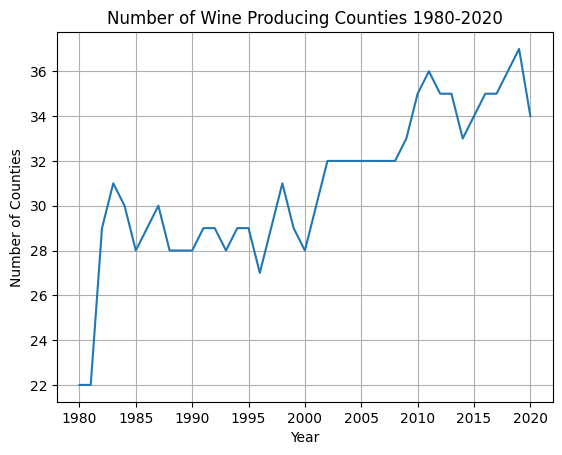

In [12]:
sns.lineplot(x = years, y = year_count)
plt.title('Number of Wine Producing Counties 1980-2020')
plt.xlabel('Year')
plt.ylabel('Number of Counties')
plt.grid(True);

## Average Yield Over the Years

In [13]:
avg_yield_per_year = []
year = 1980
while year < 2021:
    df_year = df[df['Year'] == year]['Yield(Unit/Acre)']
    avg_yield_per_year.append(df_year.mean())
    year += 1

In [14]:
# Wine producing counties in 1980
year1980 = df[df['Year']==1980]
counties1980 = list(year1980['County'])
# DF of only wine producing counties that started in 1980
df_counties1980 = pd.DataFrame()
for i in range(len(df)):
    if df.iloc[i,4] in counties1980:
        df_counties1980 = df_counties1980.append(df.iloc[i,:])

In [15]:
avg_yield_per_year_2 = []
year = 1980
while year < 2021:
    df_year = df_counties1980[df_counties1980['Year'] == year]['Yield(Unit/Acre)']
    avg_yield_per_year_2.append(df_year.mean())
    year += 1

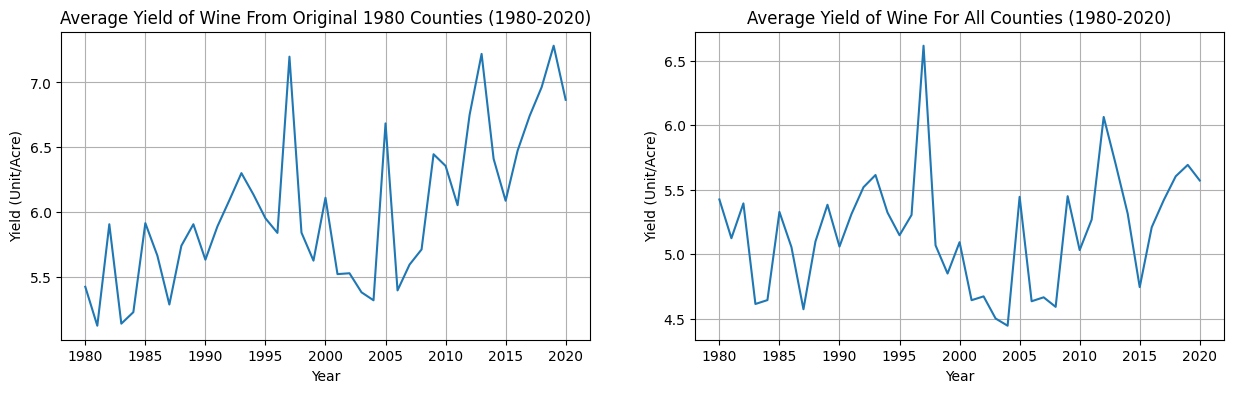

In [16]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.lineplot(x = years, y = avg_yield_per_year_2)
plt.title('Average Yield of Wine From Original 1980 Counties (1980-2020)')
plt.xlabel('Year')
plt.ylabel('Yield (Unit/Acre)')
plt.grid(True);

plt.subplot(1,2,2)
sns.lineplot(x = years, y = avg_yield_per_year)
plt.title('Average Yield of Wine For All Counties (1980-2020)')
plt.xlabel('Year')
plt.ylabel('Yield (Unit/Acre)')
plt.grid(True);

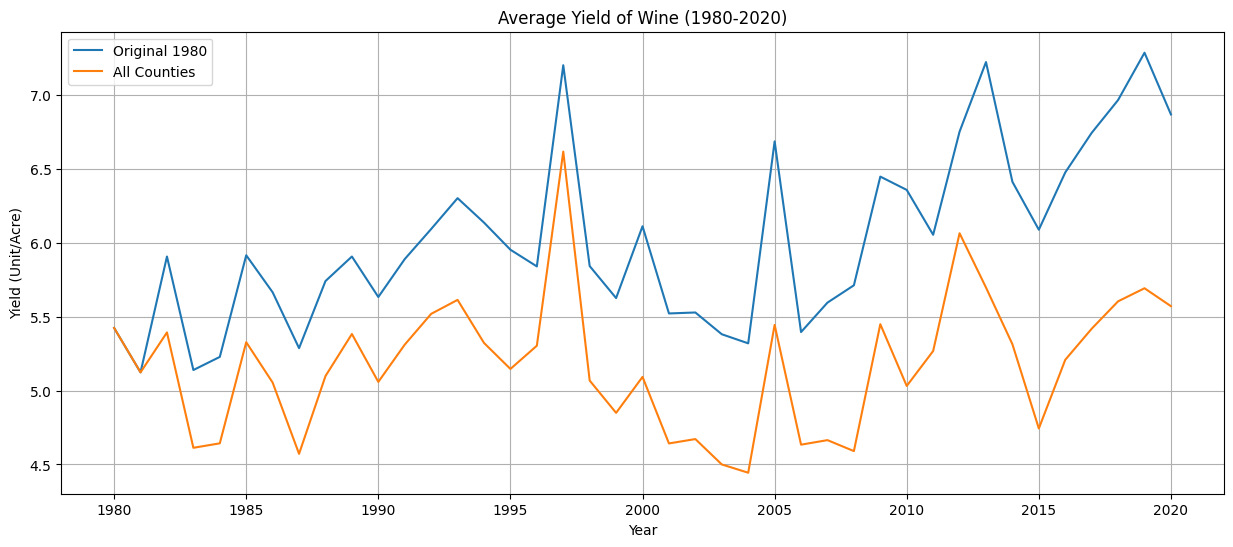

In [17]:
plt.figure(figsize=(15,6))
sns.lineplot(x = years, y = avg_yield_per_year_2)
sns.lineplot(x = years, y = avg_yield_per_year)
plt.title('Average Yield of Wine (1980-2020)')
plt.xlabel('Year')
plt.ylabel('Yield (Unit/Acre)')
plt.legend(['Original 1980', 'All Counties'], loc = 'upper left')
plt.grid(True);

## Examination of Counties in 5 Most Recent Years

In [18]:
df_2015_plus = df[df['Year'] >= 2015]

In [19]:
county_yields = {}

In [20]:
df_2015_plus

,Year,CommodityCode,CropName,CountyCode,County,HarvestedAcres,Yield(Unit/Acre),Production,Price(Dollars/Unit),Unit,Value(Dollars)
0,2020,216299,GRAPESWINE,1,Alameda,2530.0,5.14,13000.0,1497.69,Tons,19470000
1,2020,216299,GRAPESWINE,5,Amador,5360.0,2.31,12400.0,1318.31,Tons,16347000
2,2020,216299,GRAPESWINE,9,Calaveras,579.0,3.06,1770.0,1325.99,Tons,2347000
3,2020,216299,GRAPESWINE,11,Colusa,747.0,6.02,4500.0,684.67,Tons,3081000
4,2020,216299,GRAPESWINE,13,ContraCosta,1940.0,4.69,9090.0,751.27,Tons,6829000
...,...,...,...,...,...,...,...,...,...,...,...
213,2015,216299,GRAPESWINE,89,Shasta,160.0,1.20,192.0,817.71,Tons,157000
214,2015,216299,GRAPESWINE,95,Solano,4440.0,4.03,17900.0,837.32,Tons,14988000
215,2015,216299,GRAPESWINE,97,Sonoma,58200.0,3.14,183000.0,2440.10,Tons,446539000
216,2015,216299,GRAPESWINE,107,Tulare,8860.0,16.25,144000.0,297.00,Tons,42768000


In [21]:
for i in range(len(df_2015_plus)):
    county = df.iloc[i,4]
    county_yield = df.iloc[i,6]
    if county not in county_yields:
        county_yields[county] = []
        county_yields[county].append(county_yield)
    else:
        county_yields[county].append(county_yield)

In [22]:
for key in county_yields:
    county_yields[key] = sum(county_yields[key])/len(county_yields[key])

In [23]:
top_counties = []
top_yields = []

def keyfunction(k):
    return county_yields[k]

for key in sorted(county_yields, key=keyfunction, reverse=True)[:5]:
    top_counties.append(key)
    top_yields.append(county_yields[key])
    print(key, county_yields[key])

Tulare 17.088333333333335
Kings 15.028333333333336
Fresno 12.498333333333335
Madera 11.258333333333333
Merced 10.453333333333333


/Users/adamepstein/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


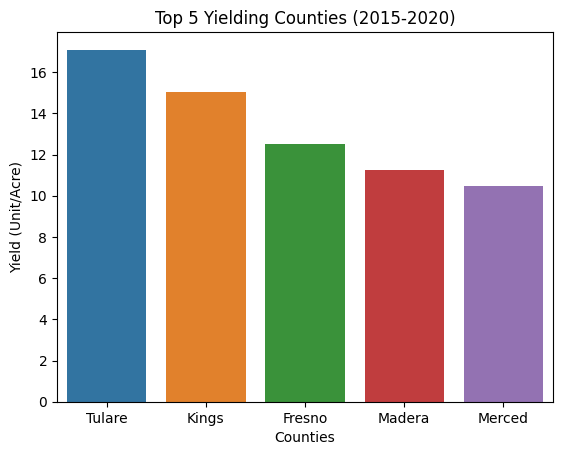

In [24]:
sns.barplot(top_counties, top_yields)
plt.title('Top 5 Yielding Counties (2015-2020)')
plt.xlabel('Counties')
plt.ylabel('Yield (Unit/Acre)');